In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('glassdoor_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,Python,R,SQL,Spark,AWS,Tableau,PowerBi,Excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,...,0,48.0,1,0,0,0,0,1,1,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,...,0,37.0,1,0,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,...,1,11.0,1,0,1,1,0,0,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,...,1,56.0,1,0,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,1,23.0,1,0,1,0,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'state', 'same_state', 'age', 'Python',
       'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'PowerBi', 'Excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'



In [6]:
df['job_category'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_category.value_counts()

data scientist    279
na                179
data engineer     116
analyst           101
mle                21
manager            20
director           14
Name: job_category, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        512
senior    216
jr          2
Name: seniority, dtype: int64

In [10]:
#  Job description length 

df['description_length'] = df['Job Description'].apply(lambda x: len(x))
df['description_length']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
725    7444
726    3401
727    3721
728    4654
729    4755
Name: description_length, Length: 730, dtype: int64

In [11]:
#Competitor count
df['no_of_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df['no_of_comp']

0      0
1      0
2      0
3      3
4      3
      ..
725    0
726    0
727    0
728    0
729    0
Name: no_of_comp, Length: 730, dtype: int64

In [17]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [18]:
df['company_txt']

0                          Tecolote Research\r
1      University of Maryland Medical System\r
2                                    KnowBe4\r
3                                       PNNL\r
4                         Affinity Solutions\r
                        ...                   
725                        Reynolds American\r
726                         Crown Bioscience\r
727                                    HOVER\r
728                             Q2 Solutions\r
729                             Q2 Solutions\r
Name: company_txt, Length: 730, dtype: object

In [15]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.Hourly_salary ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.Hourly_salary ==1 else x.max_salary, axis =1)
df['avg_salary'] = df.apply(lambda x: x.avg_salary*2 if x.Hourly_salary ==1 else x.avg_salary, axis =1)


In [16]:
df[df.Hourly_salary ==1][['Hourly_salary','min_salary','max_salary','avg_salary']]

,Hourly_salary,min_salary,max_salary,avg_salary
165,1,68,96,41.0
177,1,84,136,55.0
197,1,72,100,43.0
202,1,84,136,55.0
210,1,60,100,40.0
246,1,68,96,41.0
271,1,84,136,55.0
337,1,72,100,43.0
345,1,96,156,63.0
357,1,84,136,55.0


In [19]:
df.describe()

,Rating,Founded,Hourly_salary,Employer_provided_salary,min_salary,max_salary,avg_salary,same_state,age,Python,R,SQL,Spark,AWS,Tableau,PowerBi,Excel,description_length,no_of_comp
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,3.624658,1840.413699,0.032877,0.021918,76.083562,130.097260,101.446575,0.560274,47.567123,0.530137,0.002740,0.515068,0.226027,0.235616,0.201370,0.076712,0.521918,3905.561644,1.056164
std,0.787397,491.621341,0.178436,0.146516,30.608997,43.969657,37.760788,0.496694,53.678937,0.499433,0.052306,0.500116,0.418544,0.424674,0.401299,0.266317,0.499862,1535.710678,1.385154
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,98.250000,73.125000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2825.750000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,72.000000,125.000000,97.500000,1.000000,25.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,93.000000,156.750000,123.250000,1.000000,60.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4767.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'state', 'same_state', 'age', 'Python',
       'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'PowerBi', 'Excel',
       'job_category', 'seniority', 'description_length', 'no_of_comp'],
      dtype='object')

In [23]:
df[['age','avg_salary','Rating','description_length','no_of_comp']].corr()

,age,avg_salary,Rating,description_length,no_of_comp
age,1.000000,0.028849,0.016386,0.160721,0.126924
avg_salary,0.028849,1.000000,0.015544,0.071086,0.085043
Rating,0.016386,0.015544,1.000000,-0.021370,0.017846
description_length,0.160721,0.071086,-0.021370,1.000000,0.097677
no_of_comp,0.126924,0.085043,0.017846,0.097677,1.000000


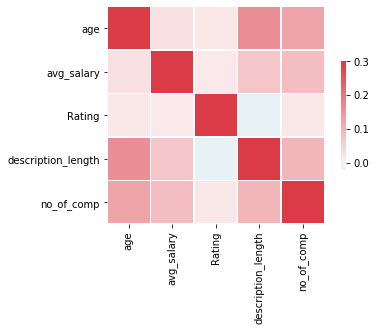

In [25]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','description_length','no_of_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'state', 'same_state', 'age', 'Python',
       'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'PowerBi', 'Excel',
       'job_category', 'seniority', 'description_length', 'no_of_comp'],
      dtype='object')

In [30]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'state','same_state','Python', 'R',
       'SQL', 'Spark','AWS', 'Excel','Tableau','PowerBi', 'job_category', 'seniority']]

graph for Location: total = 200


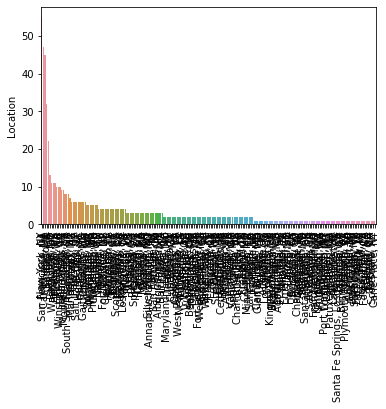

graph for Headquarters: total = 198


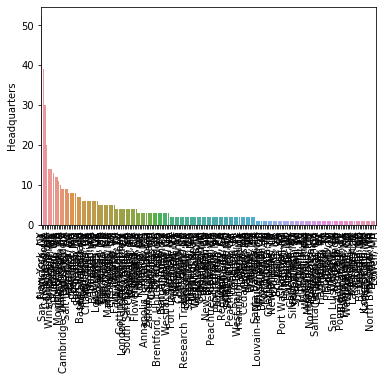

graph for Size: total = 9


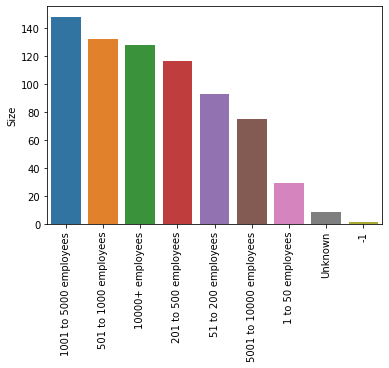

graph for Type of ownership: total = 11


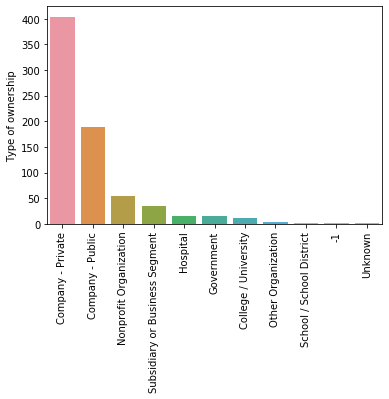

graph for Industry: total = 60


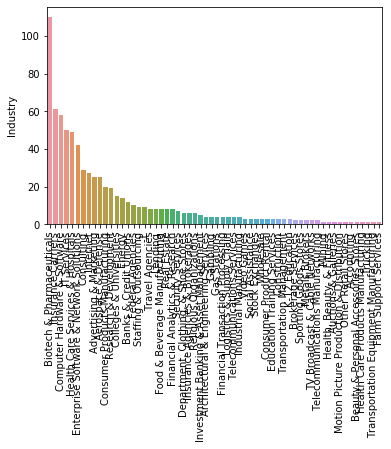

graph for Sector: total = 25


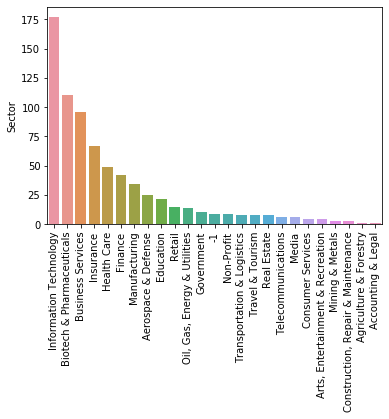

graph for Revenue: total = 14


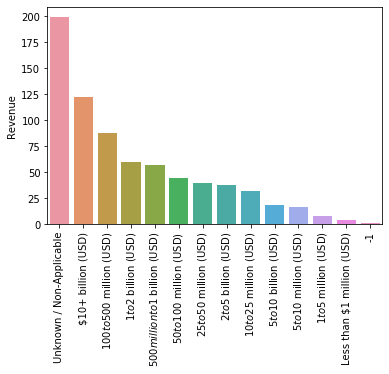

graph for company_txt: total = 342


C:\Users\primi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\primi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


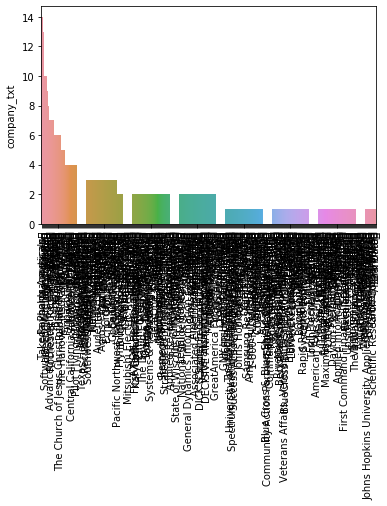

graph for state: total = 37


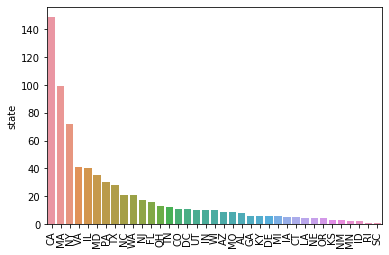

graph for same_state: total = 2


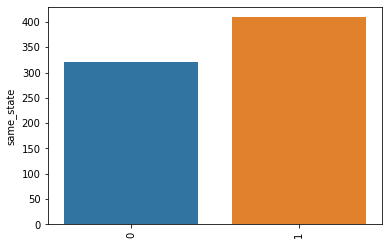

graph for Python: total = 2


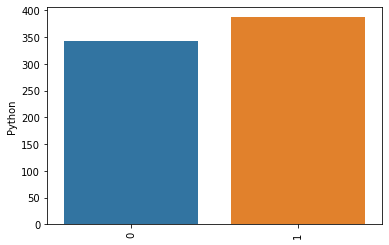

graph for R: total = 2


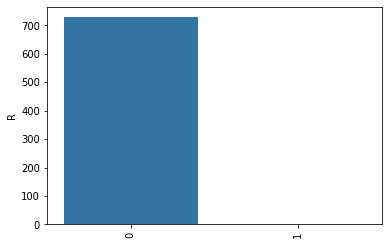

graph for SQL: total = 2


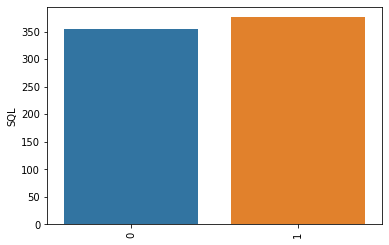

graph for Spark: total = 2


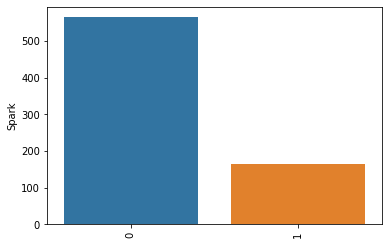

graph for AWS: total = 2


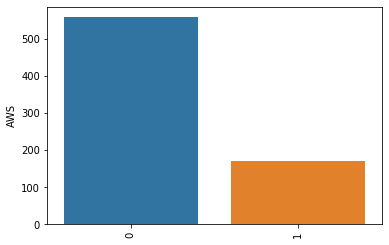

graph for Excel: total = 2


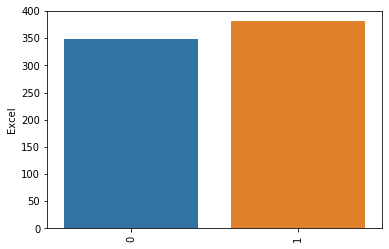

graph for Tableau: total = 2


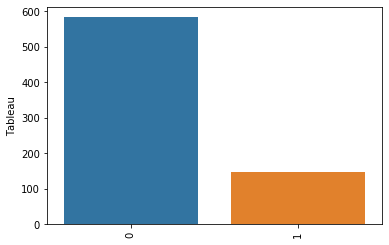

graph for PowerBi: total = 2


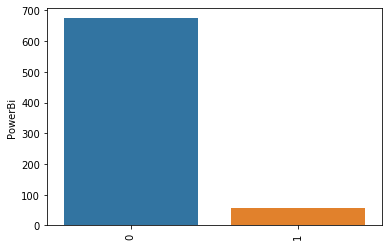

graph for job_category: total = 7


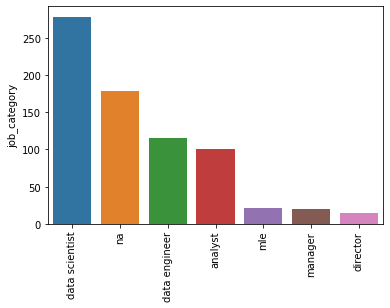

graph for seniority: total = 3


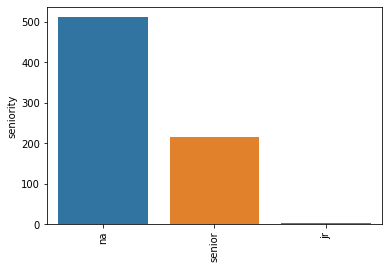

In [31]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


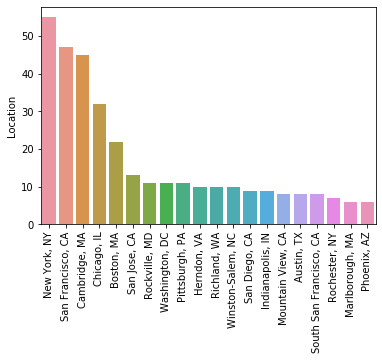

graph for Headquarters: total = 20


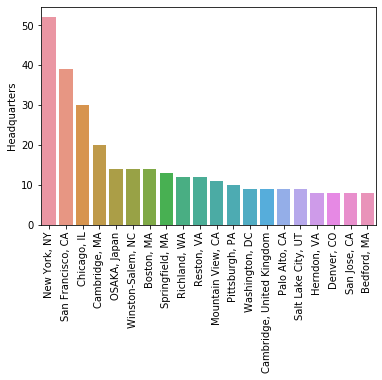

graph for company_txt: total = 20


C:\Users\primi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\primi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


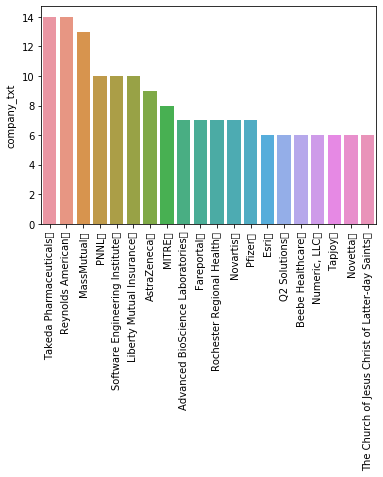

In [32]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'state', 'same_state', 'age', 'Python',
       'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'PowerBi', 'Excel',
       'job_category', 'seniority', 'description_length', 'no_of_comp'],
      dtype='object')

In [34]:
pd.pivot_table(df, index = ['company_txt','seniority'], values = 'avg_salary').sort_values('company_txt', ascending = True)

,,avg_salary
company_txt,seniority,
"1-800-FLOWERS.COM, Inc.\r",na,76.50
1904labs\r,na,143.50
23andMe\r,senior,92.00
7Park Data\r,na,121.00
<intent>\r,na,140.00
...,...,...
e-IT Professionals Corp.\r,na,139.50
goTRG\r,na,85.50
h2o.ai\r,na,148.75


In [35]:
pd.pivot_table(df, index = ['job_category','seniority'], values = 'avg_salary')

avg_salary
job_category   seniority            
analyst        jr          56.500000
               na          61.155405
               senior      77.846154
data engineer  na          96.900000
               senior     125.305556
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          82.625000
mle            na         119.714286
               senior     142.071429
na             na          78.084677
               senior     109.463636

In [38]:
pd.pivot_table(df, index = ['state','job_category'], values = 'avg_salary').sort_values('state', ascending = True)

avg_salary
state job_category              
AL    analyst          62.200000
      data engineer    65.000000
      na               43.750000
AZ    analyst          55.000000
      data engineer    79.500000
...                          ...
WA    data scientist   99.764706
      na               97.500000
WI    data scientist  113.500000
      analyst          58.833333
      na               54.000000

[114 rows x 1 columns]

In [41]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [40]:
pd.pivot_table(df,index=['job_category'],values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_category,
director,168.607143
mle,127.166667
data scientist,117.564516
data engineer,105.715517
na,87.726257
manager,82.625000
analyst,65.405941


In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'state', 'same_state', 'age', 'Python',
       'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'PowerBi', 'Excel',
       'job_category', 'seniority', 'description_length', 'no_of_comp'],
      dtype='object')

In [51]:
pd.pivot_table(df,index=['Revenue'],values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Revenue,
$5 to $10 million (USD),126.029412
$1 to $5 million (USD),119.312500
-1,117.500000
$10+ billion (USD),116.209016
Less than $1 million (USD),108.625000
Unknown / Non-Applicable,104.886935
$1 to $2 billion (USD),104.533333
$50 to $100 million (USD),102.633333
$10 to $25 million (USD),101.515625


In [54]:
df.to_csv('glassdoor_data_preprocessed.csv',index=False)